# Estudio Inmobiliario de Lisboa

Integrantes
- *Pablo Esteban Blasco*
- *Jorge Molto Molto*
- *Ignacio Martínez Serrano*

Instalamos las librerías necesarias

In [25]:
%pip install --quiet numpy
%pip install --quiet pandas
%pip install --quiet matplotlib
%pip install --quiet seaborn
%pip install --quiet scipy
%pip install --quiet fitter
%pip install --quiet statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importamos las librerias necesarias y el dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import scipy.stats as stats

# Leer el archivo CSV
data = pd.read_csv('portugal_housing.csv')

C:\Users\pablo\AppData\Local\Temp\ipykernel_14020\909917215.py:10: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


In [3]:
import warnings
warnings.filterwarnings("ignore")

# Descripción los datos


Este [dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024) contiene más de 100,000 precios reales de oferta para propiedades inmobiliarias listadas en sitios web de bienes raíces en Portugal. Los datos se obtuvieron de manera legal y ética mediante web scraping de varias plataformas en línea, asegurando el cumplimiento de los términos y condiciones de dichas plataformas.

El conjunto de datos incluye información detallada sobre cada propiedad listada, tales como:

- **Precio**: El precio de oferta de la propiedad en euros.
- **Distrito, Ciudad, Pueblo**: La ubicación geográfica de la propiedad, permitiendo un análisis regional.
- **Tipo**: El tipo de propiedad (por ejemplo, Apartamento, Casa, Garaje, Terreno).
- **Certificado Energético**: La calificación de eficiencia energética de la propiedad, según los estándares de certificación energética en Portugal.
- **Medidas de Área**: Varias columnas relacionadas con el tamaño y la superficie de la propiedad, incluyendo:
  - **Área Bruta Privada**: El área bruta privada de la propiedad.
  - **Área Útil**: El área que puede ser utilizada para habitar.
  - **Área Habitable**: El espacio realmente habitable dentro de la propiedad.
  - **Tamaño del Terreno**: La superficie del terreno asociada a la propiedad.
  - **Área Construida**: La superficie total construida de la propiedad.
- **Habitaciones, Dormitorios, Baños, Aseos**: Desglose detallado del número de habitaciones, dormitorios, baños y aseos en la propiedad.
- **Planta**: La planta en la que se encuentra la propiedad.
- **Estacionamiento, Garaje**: Información sobre la disponibilidad de estacionamiento y la presencia de un garaje.
- **Características Adicionales**: Si la propiedad incluye comodidades como ascensores o estaciones de carga para coches eléctricos.
- **Año de Construcción**: El año en que se construyó la propiedad.
- **Fecha de Publicación**: La fecha en que se publicó el anuncio.

El conjunto de datos es adecuado para una variedad de análisis, incluyendo:

- **Tendencias de precios**: Comprender la relación entre ubicación, características de las propiedades y precios de oferta.
- **Eficiencia energética**: Investigar cómo afecta la certificación energética al valor de las propiedades.
- **Análisis geográfico**: Explorar las diferencias regionales en los precios inmobiliarios a lo largo de Portugal.

Este conjunto de datos ofrece una visión completa del mercado inmobiliario portugués, permitiendo a los usuarios obtener información sobre los precios actuales, tipos de propiedades y factores geográficos que influyen en el mercado.

El objetivo de este Notebook es realizar un análisis estadístico de los datos, no una preparación de los mismos.

## Limpieza del dataset

Antes de empezar con el análisis haremos una limpieza rápida del dataset, para ello eliminaremos los elementos duplicados, así como todas aquellas filas que no tengan un valor de "price".

In [4]:
print("Elementos duplicados:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

print("Filas con precio nulo:", data["Price"].isnull().sum())
data.dropna(subset=["Price"], inplace=True)

Elementos duplicados: 6356
Filas con precio nulo: 232


# Descriptiva univariante y bivariante 

La descriptiva bivariante analiza la relación entre dos variables, permitiendo identificar patrones o asociaciones entre ellas. Según el tipo de variables involucradas, se emplean diferentes técnicas:

**Variables Categóricas (Nominativas y Ordinales)**:

- Se examinan mediante tablas de contingencia y análisis de proporciones.

- Para ordinales, se considera el posible orden jerárquico en las categorías.

En el conjunto de datos proporcionado, las **variables categoricas** pueden clasificarse de la siguiente manera:

- **Nominativas**
  - `District` (Distrito)
  - `City` (Ciudad)
  - `Town` (Pueblo)
  - `Type` (Tipo de propiedad)
  - `Lift` (Ascensor)
  - `HasParking` (Tiene estacionamiento)
  - `PublishDate` (Fecha de publicación)
  - `Garage` (Garaje)
  - `Elevator` (Ascensor)
  - `ElectricCarsCharging` (Cargador de coches eléctricos)

- **Ordinales**
  - `EnergyCertificate` (Certificado Energético)
  - `Floor` (Piso)
  - `ConservationStatus` (Estado de conservación)
<br><br>

**Variables Cuantitativas (Discretas y Continuas):**

- Se analizan con medidas como la covarianza, correlación o diagramas de dispersión.

- Si se cruzan con variables categóricas, se utilizan gráficos como boxplots o análisis de medias por categorías.

En el conjunto de datos proporcionado, las **variables cuantitativas** pueden clasificarse de la siguiente manera:

**Variables cuantitativas**

- **Discretas**
  - `Price` (Precio)
  - `TotalRooms` (Número total de habitaciones)
  - `NumberOfBedrooms` (Número de dormitorios)
  - `NumberOfBathrooms` (Número de baños)
  - `NumberOfWC` (Número de aseos)
  - `BuiltArea` (Área construida)
  - `Parking` (Capacidad de estacionamiento)

- **Continuas**
  - `ConstructionYear` (Año de construcción)
  - `TotalArea` (Área total)
  - `GrossArea` (Área bruta)
  - `LivingArea` (Área habitable)
  - `LotSize` (Tamaño del terreno)

In [5]:
# variables_categoricas_nominativas = ["District", "City", "Town", "Type", "EnergyCertificate", "Floor", "Lift", "HasParking", "PublishDate", "Garage", "Elevator", "ElectricCarsCharging", "ConservationStatus"]
# variables_cuantitativas_discretas = ["Price", "TotalRooms", "NumberOfBedrooms", "NumberOfBathrooms", "NumberOfWC", "BuiltArea", "Parking"]
# variables_cuantitativas_continuas = ["ConstructionYear", "TotalArea", "GrossArea", "LivingArea", "LotSize"]

## Descriptiva univariante 

### Variables Cuántitativas 

In [6]:
data.describe()

,Price,Parking,ConstructionYear,TotalArea,GrossArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.080350e+05,107889.000000,70164.000000,1.018210e+05,2.599300e+04,61396.000000,29162.000000,39519.000000,8.231000e+04,2.769300e+04,1.749200e+04,102897.000000
mean,3.696839e+05,0.575916,1988.328545,6.413295e+05,2.930126e+03,3.126148,2.681298,0.406868,1.575916e+03,7.268750e+04,3.791519e+03,1.499626
std,4.246609e+06,0.881442,26.659596,1.925369e+08,1.189573e+05,11.386343,1.911254,1.030176,3.858638e+04,6.197125e+06,1.438524e+05,1.717067
min,1.000000e+02,0.000000,1900.000000,-7.196067e+06,-7.000000e+00,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,7.850000e+04,0.000000,1971.000000,9.500000e+01,1.000000e+02,2.000000,2.000000,0.000000,8.000000e+01,3.000000e+02,1.072000e+02,0.000000
50%,1.999000e+05,0.000000,1993.000000,1.780000e+02,1.630000e+02,3.000000,3.000000,0.000000,1.210000e+02,8.120000e+02,1.780000e+02,1.000000
75%,3.900000e+05,1.000000,2008.000000,6.450000e+02,2.960000e+02,4.000000,3.000000,0.000000,2.160000e+02,3.372000e+03,3.250000e+02,2.000000
max,1.380000e+09,3.000000,2024.000000,6.142007e+10,1.275000e+07,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


- **Precio** (discreta): vemos que la medía (3,6e+10^5) está lejos de la mediana (2e+10^5). El rango es muy amplio, vemos un máximo muy lejos de donde parecen encontrarse la mayoría de datos. 
- **Parking** (continua): La mayoría de propiedades no tienen parking
- **ConstrucctionYear** (continua): un rango de 1988 a 2024
- **TotalArea** (continua): un comportamiento parecido al precio, la media bastante por encima de la mediana. Y un máximo muy lejos de la mayoría de los datos. Parece que hay datos anómalos, el mínimo en negativo. 
- **TotalRooms** (discreta): Las propiedades tienen una media de 3 habitacinoes y parece que hay algún dato muy lejos del resto. 
- **NumberOfWC** (discreta): Una media de 0.4 baños. Es un dato que está poco informado
- **LivingArea** (continua): comportamiento aprecido a los precio y la TotalArea

### Variables Categóricas

Vamos a ver como se distribuyen las variables categóricas. Se han cambiado los nulos por 'Sin asignar' para poder ver la cantidad de nulos en cada columna. 
Para las variables City y Town no se muestra el histograma puesto que no es relevante.

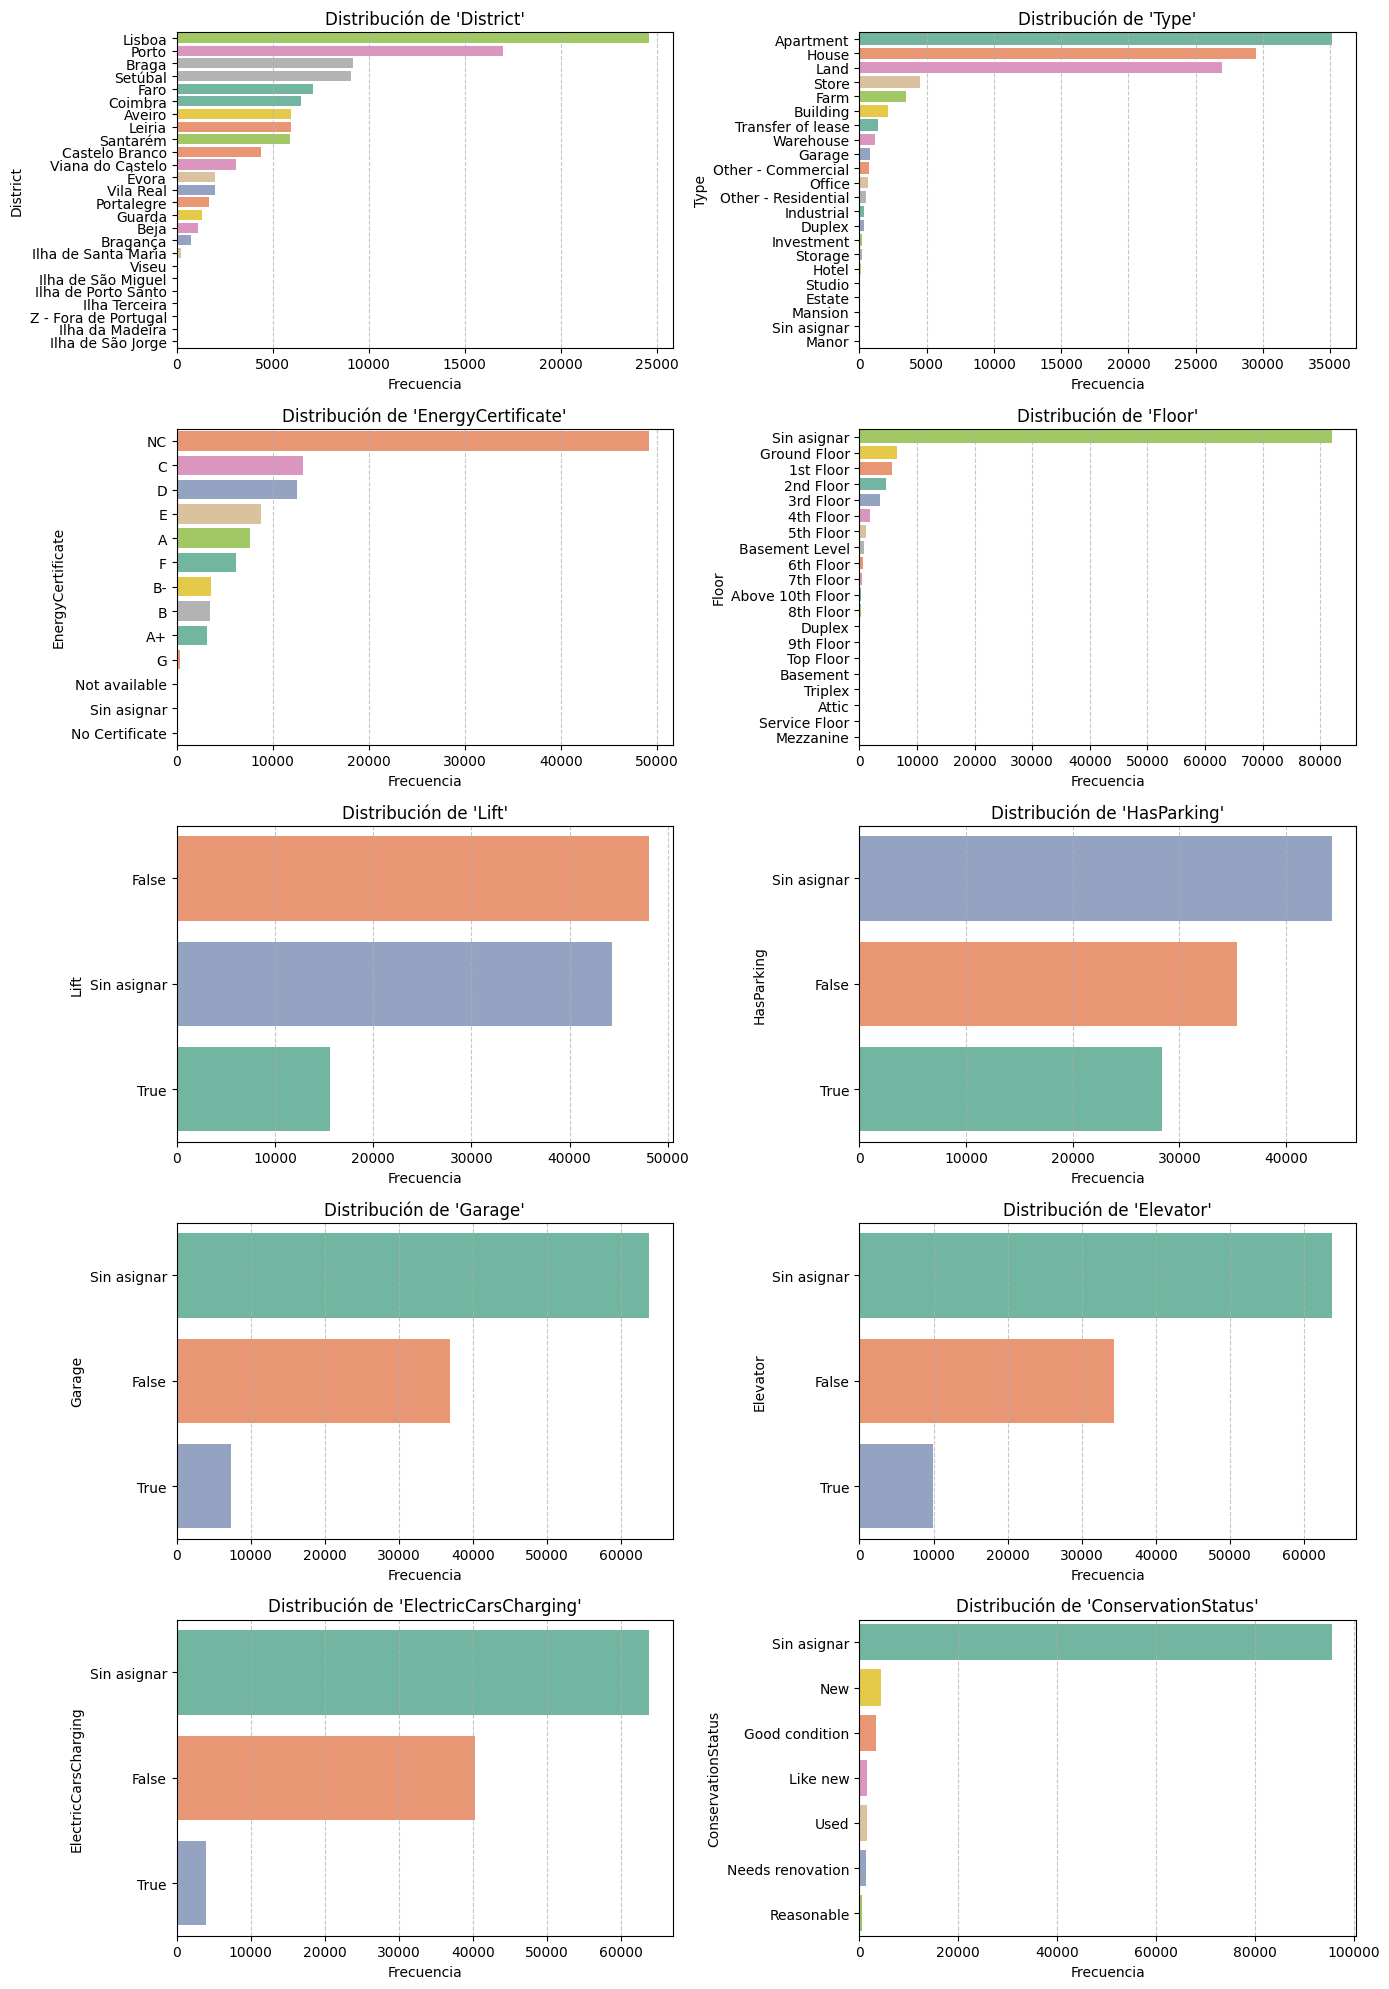

In [7]:
variables_categoricas_nominativas = ["District", "Type", "EnergyCertificate", "Floor",
    "Lift", "HasParking", "Garage", "Elevator", "ElectricCarsCharging", "ConservationStatus"
]

data_filled = data.copy()  # Crear una copia para no modificar el dataset original
data_filled[variables_categoricas_nominativas] = data_filled[variables_categoricas_nominativas].fillna("Sin asignar")

# Configuración para la figura y subplots
num_cols = len(variables_categoricas_nominativas)
fig, axes = plt.subplots(nrows=(num_cols // 2) + (num_cols % 2), ncols=2, figsize=(14, num_cols * 2))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Graficar cada columna
for idx, col in enumerate(variables_categoricas_nominativas):
    sns.countplot(
        data=data_filled,
        y=col,
        palette='Set2',
        hue=col,
        legend=False,
        order=data_filled[col].value_counts().index,
        ax=axes[idx]
    )
    axes[idx].set_title(f"Distribución de '{col}'", fontsize=12)
    axes[idx].set_xlabel("Frecuencia", fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar la disposición y eliminar subplots vacíos
for ax in axes[len(variables_categoricas_nominativas):]:
    ax.axis('off')  # Ocultar cualquier eje vacío

plt.tight_layout()
plt.show()

Podemos destacar que:
- La distribucion de propiedades es mayor en las ciudades más grandes como Lisboa u Oporto.
- El tipo de propiedad más común es "apartamento", seguido por "casa" y "tierra".
- Observando la distribución de los certificados de energía vemos como como a medida que el certificado es mayor, el numero de cases que disponen de el es menor
- En cuanto al resto de variables, disponemos de una gran cantidad de valores sin Asignar. Estos valores indican la ausencia del dato, es decir, que su valor podría ser cualquiera. Por ejemplo: en el caso de cargadores eléctricos tenemos mas de 60000 valores sin asignar, 40000 "False" y 4000 "True". No conocemos más de la mitad de los datos de la muestra ya que estos valores podrían ser "true" o "false" indistintamente. Esto mismo ocurre en variables como "Elevator", "Garage", "hasParking" o "Lift".

## Descriptiva bivariante

Para optimizar el análisis y mejorar la precisión, enfocaremos el estudio en propiedades cuyo coste sea inferior a 1.102.920 €. Este límite corresponde al umbral a partir del cual se aplica el porcentaje más alto de impuestos en Portugal, excluyendo aquellas propiedades clasificadas como de alto standing. Al centrarnos en este rango, podremos obtener conclusiones más representativas y relevantes para la mayoría de los inmuebles del mercado.

**Fuente:** [Calculadora de Impuesto Inmobiliario - Inmobiliaria Lisboa](https://inmobiliarialisboa.com/calculadora-de-impuesto-inmobiliario/)

![Cotización](img/cotizacion.png)

In [8]:
data_reduced = data[data["Price"] < 1102920]

### Análisis de variables 

### Comportamiento del precio según el tipo de propiedad

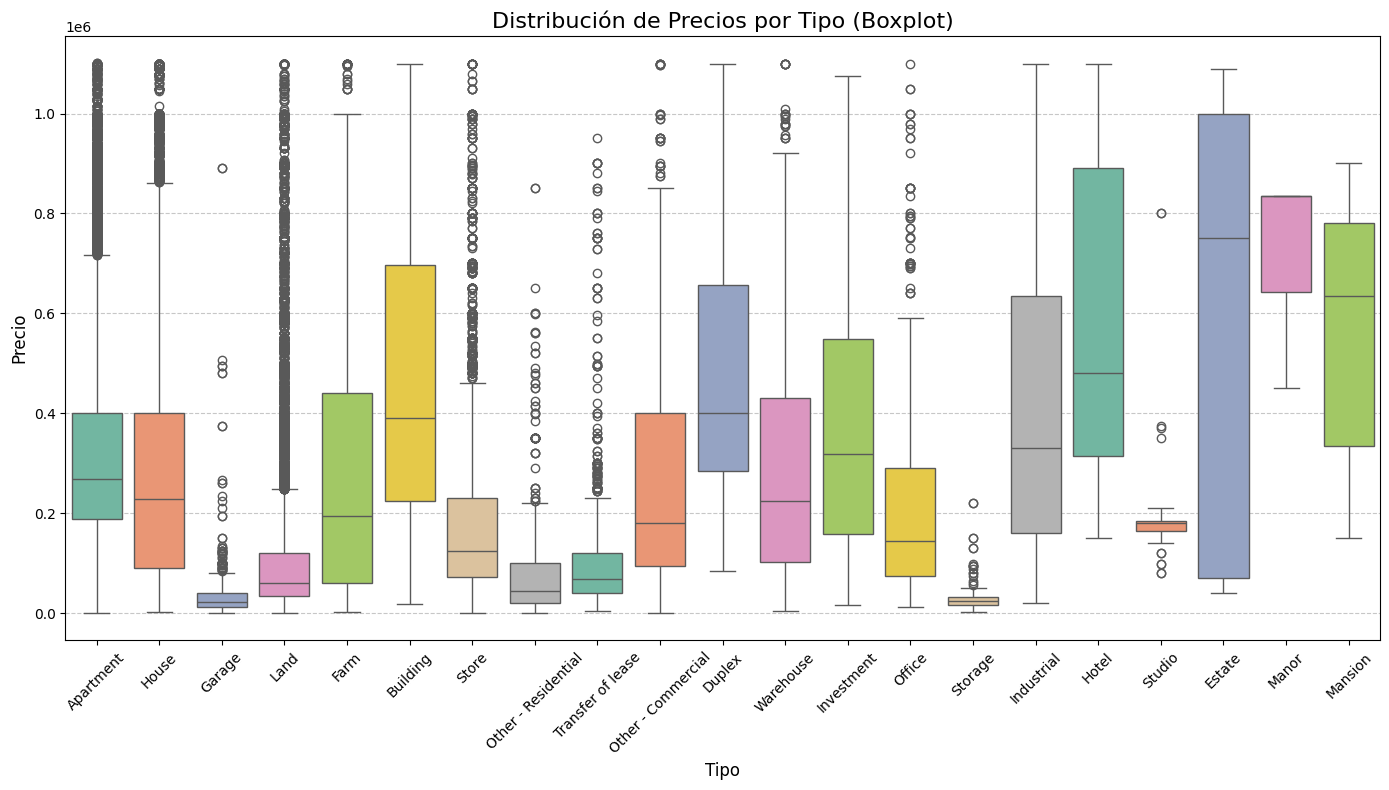

In [9]:
# Crear el diagrama de caja (boxplot)
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_reduced, x="Type", y="Price", palette="Set2", hue="Type", legend=False)

# Personalizar el gráfico
plt.title("Distribución de Precios por Tipo (Boxplot)", fontsize=16)
plt.xlabel("Tipo", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas si hay muchas categorías

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que el precio varía significativamente según el tipo de propiedad. Más adelante, evaluaremos si las diferencias entre los precios de algunos tipos de propiedades son estadísticamente significativas.

Los tipos de casas más caros son: "manor" (señorios), "state" (Conjunto de viviendas y otros edificios construidos juntos como un único desarrollo), "mansion" y "hotel". La media de todos estos tipos es superior a un 400.000€. El resto de tipos tienen la media inferior, siendo las propiedades mas baratas "garage" y "storage" seguidos por "estudio". Esto se debe a que se tratan de variables más pequeñas.

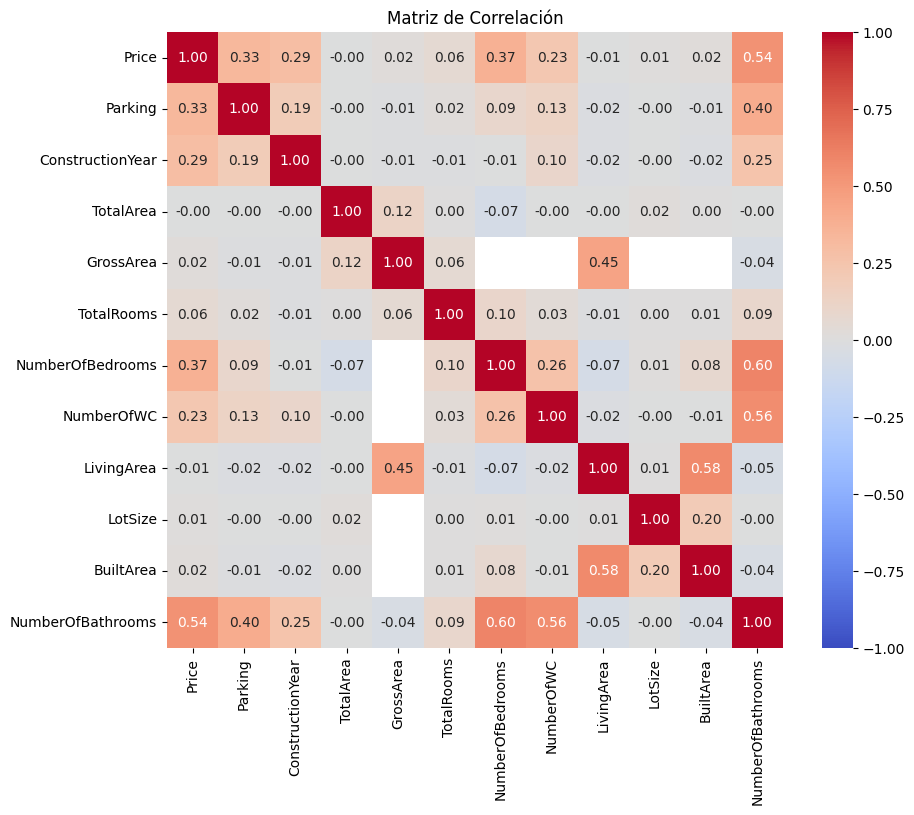

In [10]:
# Filtrar solo las columnas numéricas
numerical_data = data_reduced.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr(method='pearson')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


Observando la matriz de correlación y poniendo especial atención al precio destacamos lo siguiente: 
- Precio y Número de Baños
  - Existe una **correlación positiva moderada (0.54)** entre el precio y el número de baños.
  - Esto sugiere que las propiedades con más baños tienden a tener precios más altos.

- Precio y Número de Dormitorios
  - Hay una **correlación positiva moderada (0.37)** entre el precio y el número de dormitorios.
  - Esto indica que, a medida que aumenta el número de dormitorios, también lo hace el precio, aunque esta relación es menos significativa que con los baños.

- Precio y Espacio de Aparcamiento (Parking)
  - La **correlación positiva moderada (0.33)** entre el precio y las plazas de aparcamiento sugiere que las propiedades con más espacio para aparcar suelen ser más caras.

- Precio y Año de Construcción
  - Existe una **correlación positiva débil (0.29)** entre el precio y el año de construcción.
  - Esto indica que las propiedades más recientes tienden a ser más caras, aunque la relación no es muy fuerte.

- Precio y Área Habitable (LivingArea)
  - La correlación entre el precio y el área habitable es **muy débil (-0.01)**.
  - Esto podría significar que esta variable no tiene un impacto relevante en el precio, o que hay otros factores más importantes.

- Precio y Número de WC
  - Hay una **correlación positiva moderada (0.23)** con el número de WC, aunque esta relación es menor que con los baños.

- Precio y Otras Variables (Área Total, Área Construida, etc.)
  - Variables como el área total (TotalArea), el tamaño del lote (LotSize) y el área bruta (GrossArea) muestran **correlaciones muy bajas o cercanas a cero** con el precio.
  - Esto sugiere que no son factores clave en la determinación del precio en este conjunto de datos.



# Estudio de la normalidad de los datos
- Análisis
- Hitograma
- Simetría (media/mediana/skewness)
- Diagrama de cajas
- Q-Q plot y Shapiro
- Test de normalidad

## Histograma del precio

Procederemos a analizar la variable "Precio" mediante un histograma y boxplot, ya que consideramos que es la variable con mayor impacto en el mercado inmobiliario y en las demás variables del estudio. Este análisis nos permitirá visualizar su distribución y comprender mejor su comportamiento dentro del conjunto de datos.

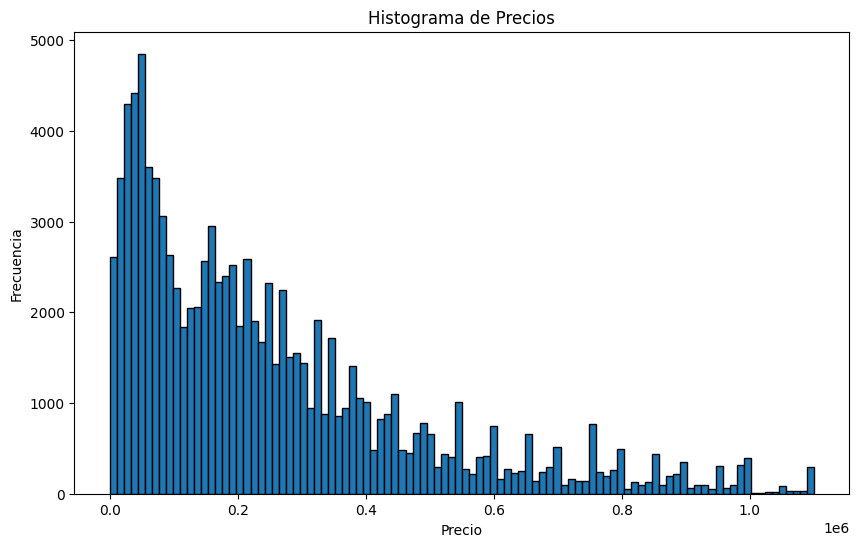

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data_reduced['Price'], bins = 100 , edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Como se puede apreciar en el historiagrama, el precio no sigue una distribución normal.

## Diagrama de cajas

Otra forma de estudiar la normalidad es con el diagrama de cajas. En la siguiente imágen, se aprecia como la distribucion no es simétrica. La mayoría de los datos se encuentran entre los valores de 100.000€ y 370.000€.

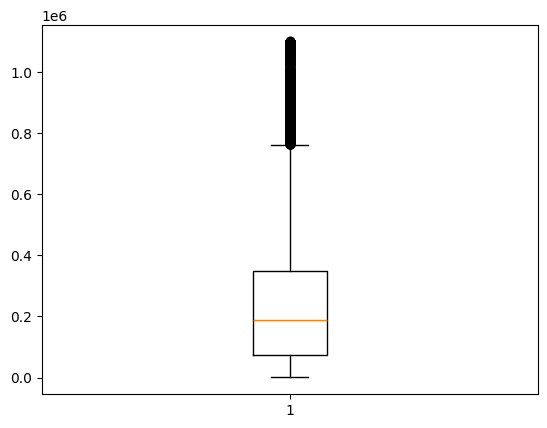

In [12]:
plt.boxplot(data_reduced["Price"])
plt.show()

## Simetrías y estadísticos

In [13]:
from scipy.stats import skew

media = data["Price"].mean()
mediana = data["Price"].median()
asimetria = skew(data["Price"])

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Asimetría (Skewness): {asimetria}")


Media: 369683.92854787805
Mediana: 199900.0
Asimetría (Skewness): 317.4386724268403


Esto confirma lo visto anteriormente en el boxplot e indica que la distribución de los precios está fuertemente sesgada hacia la derecha, es decir, hay una presencia significativa de valores atípicos elevados que incrementan la media por encima de la mediana. En este caso, la mediana es una medida más representativa del precio típico en el mercado inmobiliario. Este sesgo también confirma que la distribución no es simétrica 

## Q-Q Plot y Shapiro

Para asegurarnos de que la variable precio no sigue una distribución normal usaremos Q-Q plot. En esta gráfica se observa claramente como el precio no sigue una distribución normal.

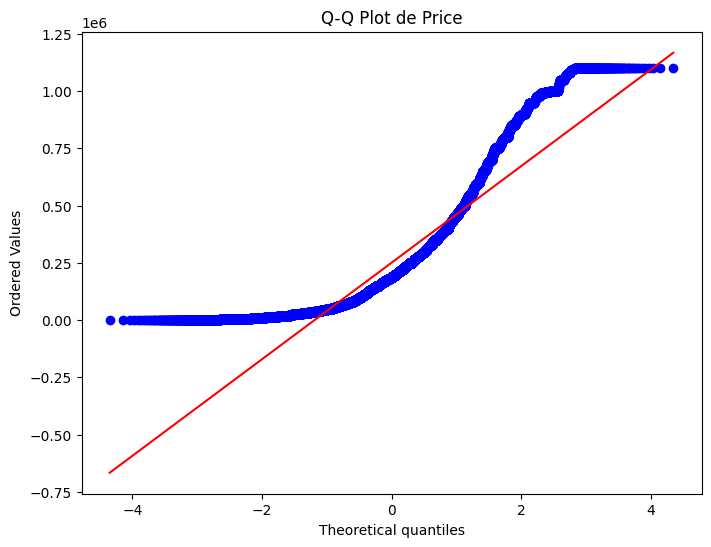

In [14]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data_reduced["Price"], dist="norm", plot=plt)
plt.title("Q-Q Plot de Price")
plt.show()


Otra forma de estudiar la normalidad es utilizar el análisis estadistico de **Shapiro**

**Hipótesis**

*Hipótesis Nula (H₀):* Los datos analizados **siguen una distribución normal**.

*Hipótesis Alternativa (H₁):* Los datos analizados **no siguen una distribución normal**.

In [15]:
from scipy.stats import shapiro

stat, p = shapiro(data["Price"])
print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los datos no siguen una distribución normal (se rechaza H0).")


Estadístico de Shapiro-Wilk: 0.012576300965830955, p-valor: 2.9310159259253548e-186
Los datos no siguen una distribución normal (se rechaza H0).


Ahora que sabemos que el precio no sigue una distribución normal, utilizaremos la librería fitter para obtener las distribuciones que mas se ajustan.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
genhalflogistic,2.755844e-16,6.405987e+04,6.408864e+04,inf,0.780329,0.0
halfnorm,4.817080e-16,3.496663e+06,3.496682e+06,inf,0.762316,0.0
skewnorm,4.817081e-16,3.496665e+06,3.496694e+06,inf,0.762316,0.0
truncnorm,6.823768e-16,3.589741e+04,3.593577e+04,inf,0.739519,0.0
cosine,1.857373e-15,inf,inf,2.223687,0.598469,0.0


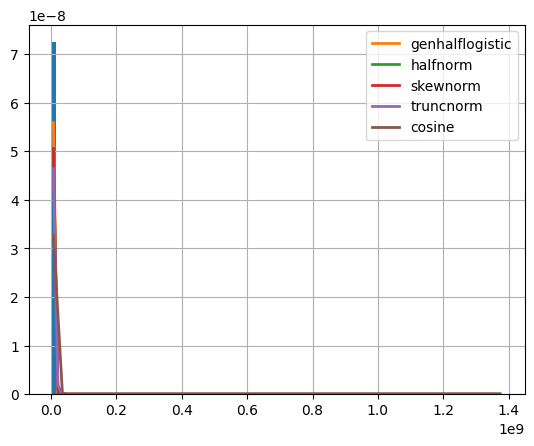

In [16]:
from fitter import Fitter, get_distributions
data = data[data["Price"].notnull()]

fitter = Fitter(
    data["Price"],
    distributions=get_distributions()  # Ajustar a las distribuciones más comunes
)
fitter.fit()
fitter.summary()

La distribucion que mas se ajusta es `genhalflogistic`, seguida de `halfnorm`.

## Análisis de la distribución de distintas columnas

Hemos realizado un análisis estadístico para evaluar la distribución de las variables clave en nuestro conjunto de datos, identificando si estas se ajustan a una distribución normal u otra. Este análisis nos ayuda a entender las características de cada variable y a seleccionar las herramientas estadísticas más adecuadas para los siguientes pasos del estudio

In [17]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

resultados_distribucion = {}

distribuciones = {
    'normal': stats.norm,
    'lognormal': stats.lognorm,
    'exponencial': stats.expon,
    'gamma': stats.gamma,
    'beta': stats.beta
}

for column in numerical_data.columns:
    # Asegurarse de que la columna no tenga valores nulos o infinitos
    cleaned_data = numerical_data[column].replace([np.inf, -np.inf], np.nan).dropna()

    if len(cleaned_data) > 0:  # Solo proceder si hay datos válidos
        resultados = {}

        for nombre, distribucion in distribuciones.items():
            try:
                # Ajustar la distribución a los datos
                params = distribucion.fit(cleaned_data)

                D, p_value = stats.kstest(cleaned_data, distribucion.cdf, args=params)

                resultados[nombre] = p_value
            except Exception as e:
                print(f"Error al ajustar la distribución {nombre} para la variable {column}: {e}")


        if resultados:
            mejor_distribucion = max(resultados, key=resultados.get)
            resultados_distribucion[column] = mejor_distribucion

for variable, distribucion in resultados_distribucion.items():
    print(f'La variable "{variable}" se ajusta mejor a la distribución: {distribucion}')

La variable "Price" se ajusta mejor a la distribución: lognormal
La variable "Parking" se ajusta mejor a la distribución: normal
La variable "ConstructionYear" se ajusta mejor a la distribución: normal
La variable "TotalArea" se ajusta mejor a la distribución: normal
La variable "GrossArea" se ajusta mejor a la distribución: normal
La variable "TotalRooms" se ajusta mejor a la distribución: normal
La variable "NumberOfBedrooms" se ajusta mejor a la distribución: normal
La variable "NumberOfWC" se ajusta mejor a la distribución: normal
La variable "LivingArea" se ajusta mejor a la distribución: normal
La variable "LotSize" se ajusta mejor a la distribución: normal
La variable "BuiltArea" se ajusta mejor a la distribución: lognormal
La variable "NumberOfBathrooms" se ajusta mejor a la distribución: normal


El análisis de las variables indica que la mayoría de ellas (Parking, ConstructionYear, TotalArea, GrossArea, TotalRooms, NumberOfBedrooms, NumberOfWC, LivingArea, LotSize, NumberOfBathrooms) se ajustan bien a una distribución normal. Esto sugiere que presentan un comportamiento simétrico y predecible en términos estadísticos.

Por otro lado, las variables Price y BuiltArea se ajustan mejor a una distribución lognormal, indicando que están sesgadas positivamente, con valores extremos elevados que afectan su distribución.


# Estimación puntual y por intervalos 

Tras el estudio de la normalidad realizaremos una estimación puntual de la media, mediana y desviación típica. También calcularemos los intervalos de confianza de la media.

In [18]:
precio_data = data_reduced["Price"]
media_precio = precio_data.mean()
mediana_precio = precio_data.median()
desviacion_estandar_precio = precio_data.std(ddof=1)

print("Media muestral:", media_precio)
print("Mediana muestral:", mediana_precio)
print("Desviación estandar muestral:", desviacion_estandar_precio)


Media muestral: 250596.72141205383
Mediana muestral: 189000.0
Desviación estandar muestral: 227114.79553743007


Nuestro objetivo es estimar la media poblacional a partir de la muestra obtenida, calculando un intervalo de confianza que nos permita determinar, con un nivel de confianza predefinido, el rango en el que probablemente se encuentra la media real de la población.

Dado que disponemos de una muestra lo suficientemente grande, podemos aplicar el **Teorema Central del Límite**, que establece que la distribución de la media muestral tiende a seguir una distribución normal, independientemente de la distribución de la población original, siempre que, como en nuestro caso, el tamaño de la muestra sea suficientemente grande.

In [19]:
sample_size = data_reduced["Price"].shape[0]
sample_mean = data_reduced["Price"].mean()

nivel_confianza = 0.95

z_critical = stats.norm.ppf(q = ((1 + nivel_confianza) / 2))  # Get the z-critical value*
print("z-critical value:", z_critical)

sample_stdev = data_reduced["Price"].std(ddof=1)  # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = z_critical * sigma

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Intervalo de confianza: {confidence_interval[0]:.3f}€ - {confidence_interval[1]:.3f}€")

z-critical value: 1.959963984540054
Intervalo de confianza: 249203.913€ - 251989.530€


El intervalo de confianza calculado indica que, con un nivel de confianza del 95%, la media real de los precios se encuentra entre **249,913.79€** y **252,618.92€**.

# Realización de contrastes de hipótesis oportunos para realizar inferencia con los datos

Cuestiones a estudiar: 
- ¿Es el precio de los garajes más bajo que el del grupo? 
- ¿Son los precios de los apartamentos similares a los de buildings?

In [20]:
from scipy.stats import mannwhitneyu

# Extraer precios de los garages y el grupo completo
precio_garages = data_reduced[data_reduced['Type'] == 'Garage']['Price']
precio_total = data_reduced['Price']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(precio_garages, precio_total, alternative='less')
print(f'Estadístico de Mann-Whitney U: {stat}, p-valor: {p_value}')
if p_value < 0.05:
    print("Rechazamos H0: Los precios de los garages son significativamente más bajos que el grupo completo.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para decir que los precios de los garages son más bajos que el grupo completo.")


Estadístico de Mann-Whitney U: 8119754.5, p-valor: 9.980217486393456e-306
Rechazamos H0: Los precios de los garages son significativamente más bajos que el grupo completo.


In [21]:
# Extraer precios de los apartamentos y buildings
precio_apartamentos = data_reduced[data_reduced['Type'] == 'Apartment']['Price']
precio_buildings = data_reduced[data_reduced['Type'] == 'Building']['Price']

# Prueba de Mann-Whitney U
stat, p_value = mannwhitneyu(precio_apartamentos, precio_buildings, alternative='two-sided')
print(f'Estadístico de Mann-Whitney U: {stat}, p-valor: {p_value}')
if p_value < 0.05:
    print("Rechazamos H0: Los precios de los apartamentos no son similares a los de los buildings.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para decir que los precios de los apartamentos no son similares a los de los buildings.")


Estadístico de Mann-Whitney U: 20241071.5, p-valor: 8.28587376711794e-77
Rechazamos H0: Los precios de los apartamentos no son similares a los de los buildings.


# ANOVA / Kruskal-Wallis

El análisis de varianza (ANOVA) es una técnica estadística utilizada para comparar las medias de tres o más grupos. Para aplicar ANOVA de manera adecuada, se deben cumplir las siguientes condiciones:

1. **Independencia de las Observaciones**  
   - Los datos de los grupos deben ser independientes entre sí. Esto significa que las observaciones dentro de un grupo no deben influir en las de otro.

2. **Normalidad de las Distribuciones**  
   - Las distribuciones de los datos dentro de cada grupo deben aproximarse a una distribución normal. 

3. **Homogeneidad de Varianzas**  
   - Las varianzas de los diferentes grupos deben ser similares. Este supuesto puede evaluarse mediante pruebas como Levene o Bartlett.

4. **Escala de Medición**  
   - La variable dependiente debe ser medida en una escala continua o al menos ordinal con intervalos aproximadamente iguales.

Si estas reglas no se cumplen, es posible que los resultados del ANOVA no sean válidos.

Comprobamos si las distribuciones de los precios de los distintos grupos que forman el dataset siguen una distribución normal. A partir del análisis visual del *multiple boxplot* del análisis bivariante, observamos que las distribuciones no parecen ajustarse a una distribución normal. Sin embargo, para obtener una validación estadística más precisa, realizaremos la prueba de Shapiro-Wilk.

In [22]:
## Precios de Apartement

stat, p = shapiro(data_reduced[data_reduced["Type"] == "Apartment"]["Price"])

print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los precios de Apartement parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los precios de Apartement no siguen una distribución normal (se rechaza H0).")

## Precios de house

stat, p = shapiro(data_reduced[data_reduced["Type"] == "House"]["Price"])

print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los precios de House parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los precios de House no siguen una distribución normal (se rechaza H0).")

## Precios de land

stat, p = shapiro(data_reduced[data_reduced["Type"] == "Land"]["Price"])

print(f"Estadístico de Shapiro-Wilk: {stat}, p-valor: {p}")

if p > 0.05:
    print("Los precios de Land parecen seguir una distribución normal (no se rechaza H0).")
else:
    print("Los precios de Land no siguen una distribución normal (se rechaza H0).")

Estadístico de Shapiro-Wilk: 0.8801553377573947, p-valor: 1.2966102879836937e-92
Los precios de Apartement no siguen una distribución normal (se rechaza H0).
Estadístico de Shapiro-Wilk: 0.889267438504998, p-valor: 4.402025232108341e-86
Los precios de House no siguen una distribución normal (se rechaza H0).
Estadístico de Shapiro-Wilk: 0.5943860760002576, p-valor: 7.925192070335226e-118
Los precios de Land no siguen una distribución normal (se rechaza H0).


Cómo determina el test Shapiro, las distribuciones del precio de los diferentes grupos no siguen una distribución normal, por tanto, no cumplimos los criterios de aplicabilidad de ANOVA. 
Es su lugar, podemos utilizar la prueba de Kruskal-Wallis. Permite evaluar si existen diferencias significativas entre más de dos grupos sin asumir que los datos siguen una distribución normal.

### ¿Hay diferencia significativa de precio entre los tipo: Apartment, House, Land y Store? 
Estas 4 propiedades son las propiedades más frecuentes dentro del dataset. 

In [23]:
# Suponiendo que tienes los datos divididos en grupos
P_Mansion = data_reduced[data_reduced['Type'] == 'Apartment']['Price']
P_Hotel = data_reduced[data_reduced['Type'] == 'House']['Price']
P_Manor= data_reduced[data_reduced['Type'] == 'Land']['Price']
P_State = data_reduced[data_reduced['Type'] == 'Store']['Price']
# Realizar la prueba de Kruskal-Wallis

stat, p_value = stats.kruskal(P_Mansion, P_Hotel, P_Manor, P_State)
print(f'Estadística de prueba: {stat}, Valor p: {p_value}')


Estadística de prueba: 26114.56364674622, Valor p: 0.0


- **P-valor**: 0
- **Hipótesis nula**: Las medianas de los precios de las propiedades son iguales en todos los grupos.
- **Conclusión**: Rechazamos la hipótesis nula. Existen diferencias significativas entre los precios de los distintos tipos de propiedades (Apartment, House, Land, Store).


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1  group2   meandiff   p-adj    lower        upper     reject
--------------------------------------------------------------------
Apartment  House  -36375.6182   0.0  -40603.3804   -32147.856   True
Apartment   Land -207170.4984   0.0 -211461.0617 -202879.9351   True
Apartment  Store  -138179.345   0.0 -146536.1132 -129822.5767   True
    House   Land -170794.8802   0.0 -175293.9112 -166295.8492   True
    House  Store -101803.7268   0.0 -110269.4176  -93338.0359   True
     Land  Store   68991.1534   0.0   60493.9255   77488.3813   True
--------------------------------------------------------------------


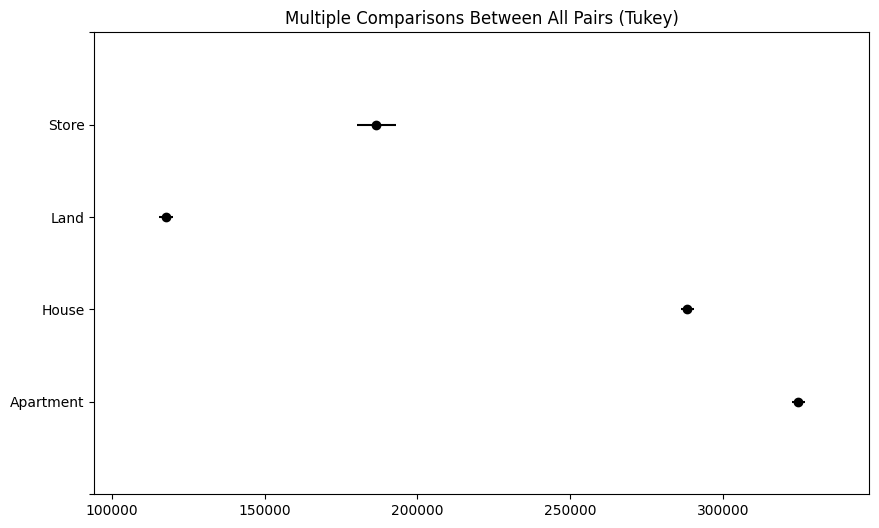

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Crear una lista con todas las propiedades y sus respectivas categorías
prices = pd.concat([P_Mansion, P_Hotel, P_Manor, P_State])
types = ['Apartment'] * len(P_Mansion) + ['House'] * len(P_Hotel) + ['Land'] * len(P_Manor) + ['Store'] * len(P_State)

# Aplicar la prueba de Tukey para las comparaciones post-hoc
tukey = pairwise_tukeyhsd(endog=prices,  # Datos de precios
                          groups=types,  # Tipos de propiedad (grupos)
                          alpha=0.05)  # Nivel de significancia

# Graficar los intervalos de confianza de las comparaciones
tukey.plot_simultaneous()
plt.vlines(x=0,ymin=-0.5,ymax=4.5, color="red")  # Línea vertical para el valor p = 0

# Mostrar los resultados del resumen
print(tukey.summary())


Análisis del gráfico de Tukey

El gráfico de Tukey presenta las comparaciones entre las medias de precios de diferentes tipos de propiedades: **Store**, **Land**, **House**, y **Apartment**.

- **Store** muestra el precio más alto, seguido de **Apartment**.
- **Land** tiene el precio más bajo, y su intervalo de confianza no se cruza con el de **Store**, lo que indica una diferencia significativa.
- **House** y **Apartment** tienen precios intermedios, pero sus intervalos de confianza se superponen, lo que sugiere que no hay una diferencia estadísticamente significativa entre ellos.